In [1]:
using Plots

In [20]:
function Find_Crossing(func, y_point, x)
    N = length(func)
    f = func .- y_point
    x_intercepts = []

    for i in 1:N-1
        if f[i]*f[i+1] < 0
            # Linear interpolation to find the crossing point
            dfdx = (f[i+1] - f[i]) / (x[i+1] - x[i])
            x_intercept = x[i] - f[i]/dfdx
            x_intercepts = push!(x_intercepts, x_intercept)
        end
        
    end
    return x_intercepts
end

Find_Crossing (generic function with 1 method)

n₀(λ₁) = 1.645757816735911
nₑ(λ₂) = 4.202046589655666


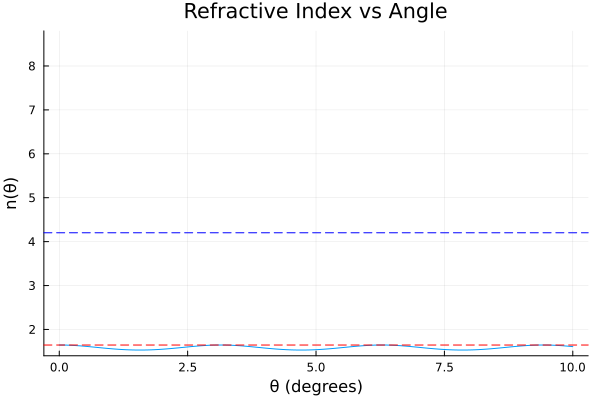

In [34]:
n₀2(λ) = 2.73359 + 0.01878/(λ^2 - 0.01822) - 0.01354λ^2
nₑ2(λ) = 2.3753 + 0.01224/(λ^2 - 0.01667) - 0.01516λ^2
n₀(λ) = sqrt(n₀2(λ))
nₑ(λ) = sqrt(nₑ2(λ))
λ₁ = 1558
λ₂ = 532 
λ₁ = λ₁ * 1e-3  # Convert to micrometers
λ₂ = λ₂ * 1e-3  # Convert to micrometers
# λ₃ = 1/(1/λ₁ + 1/λ₂)  # Wavelength of the mixed light
θs = range(0, 10, length=1000)
n(λ,θ) = 1/sqrt((cos(θ)/n₀(λ))^2 + (sin(θ)/nₑ(λ))^2)
func = n₀(λ₁)/λ₁ + n₀(λ₂)/λ₂
println("n₀(λ₁) = ", n₀(λ₁))
println("nₑ(λ₂) = ", func)
# println(Find_Crossing(n.(λ₃, θs), n₀(λ₁), θs)[1])
plot(θs, n.(λ₁, θs), xlabel="θ (degrees)", ylabel="n(θ)", title="Refractive Index vs Angle", legend=false)
hline!([n₀(λ₁)], label="n₀(λ₁)", linestyle=:dash, color=:red)
hline!([func], label="nₑ(λ₂)", linestyle=:dash, color=:blue)
# ylims!((max(n₀(λ₁), nₑ(λ₂)) + 0.1, min(n₀(λ₁), nₑ(λ₂)) - 0.1))
ylims!((1.4, 8.8))